<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Species-Segmentation-with-Cluster-Analysis" data-toc-modified-id="Species-Segmentation-with-Cluster-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Species Segmentation with Cluster Analysis</a></span><ul class="toc-item"><li><span><a href="#Import-the-relevant-libraries" data-toc-modified-id="Import-the-relevant-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the relevant libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Plot-the-data" data-toc-modified-id="Plot-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot the data</a></span></li></ul></li><li><span><a href="#Clustering-(unscaled-data)" data-toc-modified-id="Clustering-(unscaled-data)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering (unscaled data)</a></span></li><li><span><a href="#Standardize-the-variables" data-toc-modified-id="Standardize-the-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Standardize the variables</a></span></li><li><span><a href="#Clustering-(scaled-data)" data-toc-modified-id="Clustering-(scaled-data)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clustering (scaled data)</a></span><ul class="toc-item"><li><span><a href="#Take-Advantage-of-the-Elbow-Method" data-toc-modified-id="Take-Advantage-of-the-Elbow-Method-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Take Advantage of the Elbow Method</a></span><ul class="toc-item"><li><span><a href="#WCSS" data-toc-modified-id="WCSS-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>WCSS</a></span></li><li><span><a href="#The-Elbow-Method" data-toc-modified-id="The-Elbow-Method-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>The Elbow Method</a></span></li></ul></li></ul></li></ul></div>

# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import sklearn

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
sns.set()

# seaborn warnings ignore
import warnings
warnings.filterwarnings('ignore')

# Jupyter notebook settings for pandas
pd.set_option('display.float_format', '{:,.2f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 100)


# ipython
from IPython.display import Image

In [2]:
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [3]:
!ls ../data/csv

Bank-data-testing.csv                Example-bank-data.csv                real_estate_price_size_year.csv
Bank-data.csv                        iris-dataset.csv                     real_estate_price_size_year_view.csv
Categorical.csv                      iris-with-answers.csv
Countries-exercise.csv               real_estate_price_size.csv


In [4]:
df = pd.read_csv('../data/csv/iris-dataset.csv')
print(df.shape)
df.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

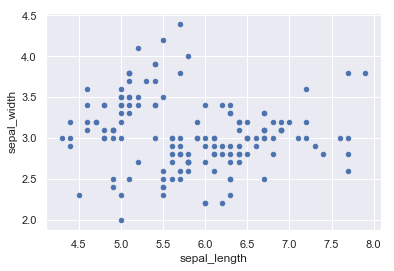

In [5]:
df.plot(kind='scatter',x='sepal_length',y='sepal_width',c='b');

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [6]:
x = df.copy()
kmeans = KMeans(n_clusters=2,random_state=100)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [7]:
pred = kmeans.fit_predict(x)
df['pred'] = pred

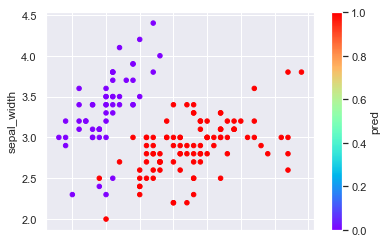

In [8]:
df.plot(kind='scatter',x='sepal_length',y='sepal_width',c='pred',cmap='rainbow');

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [9]:
from sklearn import preprocessing

In [10]:
x_scaled = preprocessing.scale(x)
x_scaled[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# Clustering (scaled data)

In [11]:
kmeans_scaled = KMeans(n_clusters=2, random_state=100)
kmeans_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [12]:
df['pred_scaled'] = kmeans_scaled.fit_predict(x_scaled)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_scaled
0,5.10,3.50,1.40,0.20,0,0
1,4.90,3.00,1.40,0.20,0,0
2,4.70,3.20,1.30,0.20,0,0
3,4.60,3.10,1.50,0.20,0,0
4,5.00,3.60,1.40,0.20,0,0


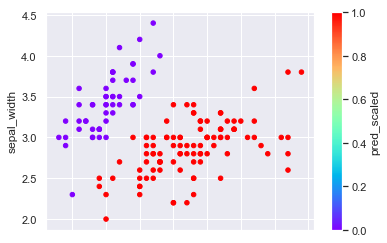

In [13]:
df.plot(kind='scatter',x='sepal_length',y='sepal_width',c='pred_scaled',cmap='rainbow');

## Take Advantage of the Elbow Method

### WCSS

In [14]:
max_ncluster = 10
wcss = [KMeans(n_clusters=i,random_state=100).fit(x_scaled).inertia_ for i in range(1,max_ncluster)]
wcss

[600.0,
 223.73200573676343,
 140.96581663074699,
 114.42714544645855,
 91.02916928379733,
 81.53197201842735,
 70.90458524592049,
 62.6196948572166,
 55.39943159226493]

### The Elbow Method

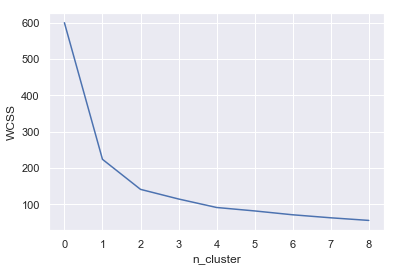

In [15]:
plt.plot(wcss)
plt.xlabel('n_cluster')
plt.ylabel('WCSS');

How many clusters are there?